###  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

### Merging all csv files into one dataframe

In [2]:
'''files = [file for file in os.listdir("./Sales_data")]

all_files = pd.DataFrame()

for file in files:
    sales_df = pd.read_csv("./Sales_data/"+file)
    all_files = pd.concat([all_files, sales_df])

all_files.to_csv("all_files.csv", index = False)'''

'files = [file for file in os.listdir("./Sales_data")]\n\nall_files = pd.DataFrame()\n\nfor file in files:\n    sales_df = pd.read_csv("./Sales_data/"+file)\n    all_files = pd.concat([all_files, sales_df])\n\nall_files.to_csv("all_files.csv", index = False)'

### Read File in Updated Dataframe

In [3]:
all_data = pd.read_csv('all_files.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean up data

In [5]:
# Dropping all NaN rows
NaN_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# Finding 'Or' and deleting it!!
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Change '==' to '!=' and redifine temp_df back to all_data
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [8]:
# Change data types of 'Price Each' and 'Quantity Ordered' columns
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# make float

### Augmenting data with additional columns

## Task 2: Add Month Column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Task 3: Add Sales Column

In [10]:
# Adding a column for total sales
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
# Convert 'Order Date' to datetime format
#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [12]:
all_data['Order Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 185950 entries, 0 to 186849
Series name: Order Date
Non-Null Count   Dtype 
--------------   ----- 
185950 non-null  object
dtypes: object(1)
memory usage: 2.8+ MB


## Task 4: Add City Column

In [13]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

def get_address(address):
    return address.split(',')[0]

def get_zipcode(number):
    return number.split(' ')[-1]
        
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data['Zip Code'] = all_data['Purchase Address'].apply(lambda z: get_zipcode(z))
all_data['Purchase Address'] = all_data['Purchase Address'].apply(lambda y: get_address(y))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Zip Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,917 1st St,4,23.90,Dallas TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,682 Chestnut St,4,99.99,Boston MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,669 Spruce St,4,600.00,Los Angeles CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,669 Spruce St,4,11.99,Los Angeles CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,333 8th St,4,11.99,Los Angeles CA,90001


#### Q1: What was the best month for Sales? How much was earned that month?

In [14]:
results = all_data.groupby('Month').sum(numeric_only=True)

In [15]:
import datetime 

all_data['Month Name'] = pd.to_datetime(all_data['Order Date']).dt.strftime('%b')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Zip Code,Month Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,917 1st St,4,23.90,Dallas TX,75001,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,682 Chestnut St,4,99.99,Boston MA,02215,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,669 Spruce St,4,600.00,Los Angeles CA,90001,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,669 Spruce St,4,11.99,Los Angeles CA,90001,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,333 8th St,4,11.99,Los Angeles CA,90001,Apr


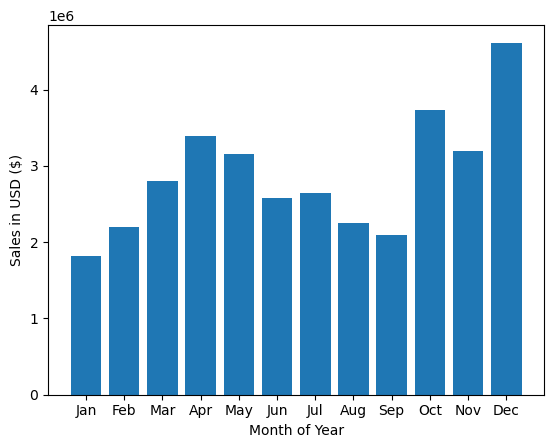

In [16]:
# Plottin a bar graph
month_to_number = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

months = all_data['Month Name'].unique()
sorted_months = sorted(months, key=lambda x: month_to_number[x])

plt.bar(sorted_months, results.Sales)
plt.xlabel('Month of Year')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Q2: What US City had the highest number of sales?

In [17]:
highest_city_by_sales = all_data.groupby('City').sum(numeric_only=True)
highest_city_by_sales.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80


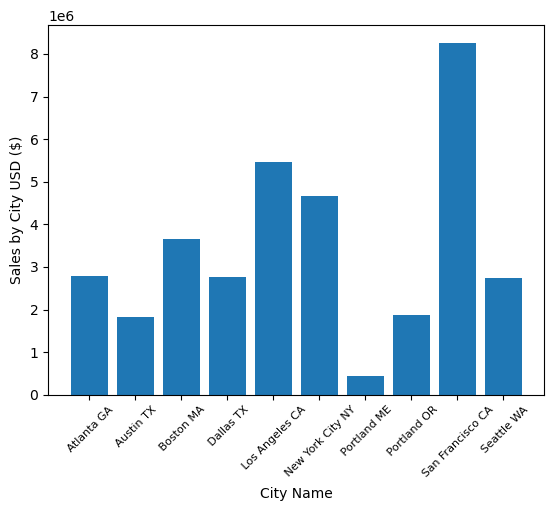

In [18]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, highest_city_by_sales['Sales'])
plt.xticks(cities, rotation = 45, fontsize = 8)
plt.xlabel('City Name')
plt.ylabel('Sales by City USD ($)')
plt.show()

#### Q3: What time should we display advertisements to maximize likelihood of customers buying our product?

In [19]:
# Convert 'Order Date' to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [20]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Zip Code,Month Name,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,4,23.90,Dallas TX,75001,Apr,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,4,99.99,Boston MA,02215,Apr,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,4,600.00,Los Angeles CA,90001,Apr,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,4,11.99,Los Angeles CA,90001,Apr,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,4,11.99,Los Angeles CA,90001,Apr,9,27


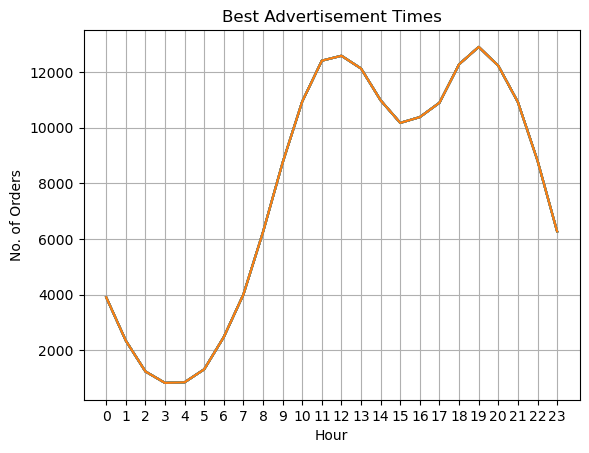

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.title('Best Advertisement Times')
plt.grid()
plt.show()

#### Q4: What products are most often sold together?

In [22]:
new_df = all_data[all_data['Order ID'].duplicated(keep=False)]
new_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Zip Code,Month Name,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,4,600.00,Los Angeles CA,90001,Apr,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,4,11.99,Los Angeles CA,90001,Apr,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,20 Hill St,4,600.00,Los Angeles CA,90001,Apr,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,20 Hill St,4,11.95,Los Angeles CA,90001,Apr,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,823 Highland St,4,99.99,Boston MA,02215,Apr,11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,823 Highland St,4,99.99,Boston MA,02215,Apr,11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,365 Center St,4,5.98,San Francisco CA,94016,Apr,17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,365 Center St,4,600.00,San Francisco CA,94016,Apr,17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,778 Maple St,4,14.95,New York City NY,10001,Apr,11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,778 Maple St,4,11.95,New York City NY,10001,Apr,11,7


In [23]:
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
new_df = new_df[['Order ID', 'Grouped']].drop_duplicates()
new_df.head()

C:\Users\jclin\AppData\Local\Temp\ipykernel_5968\2263066282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df.Grouped:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) # Passing a 3 will give 3 most common
    
for key, value in count.most_common(10): # .most_common is a function in collections library
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### Q5: What product sold the most? Why?

C:\Users\jclin\AppData\Local\Temp\ipykernel_5968\3304995057.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = prod_group.sum()['Quantity Ordered']
C:\Users\jclin\AppData\Local\Temp\ipykernel_5968\3304995057.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']


Text(0.5, 1.0, 'Item Sales')

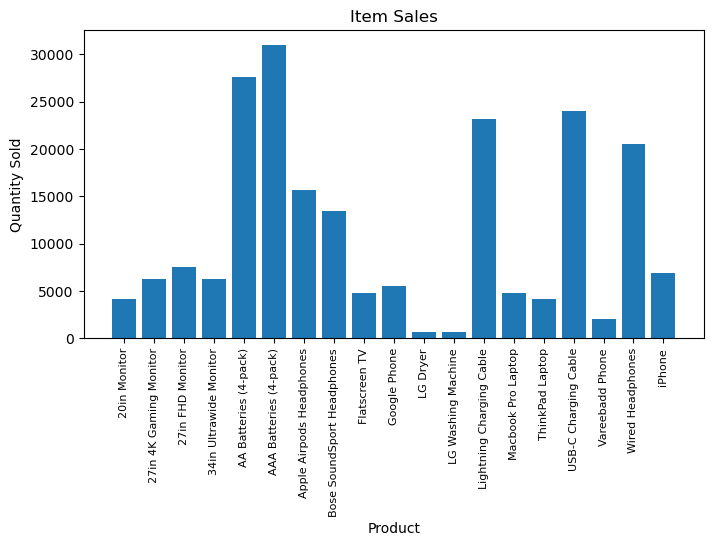

In [25]:
prod_group = all_data.groupby('Product')
quantity_ordered = prod_group.sum()['Quantity Ordered']

products = [product for product, df in prod_group]
prices = all_data.groupby('Product').mean()['Price Each']

plt.figure(figsize = (8, 4))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical', fontsize = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Item Sales')

C:\Users\jclin\AppData\Local\Temp\ipykernel_5968\1714670941.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=8, color='r')


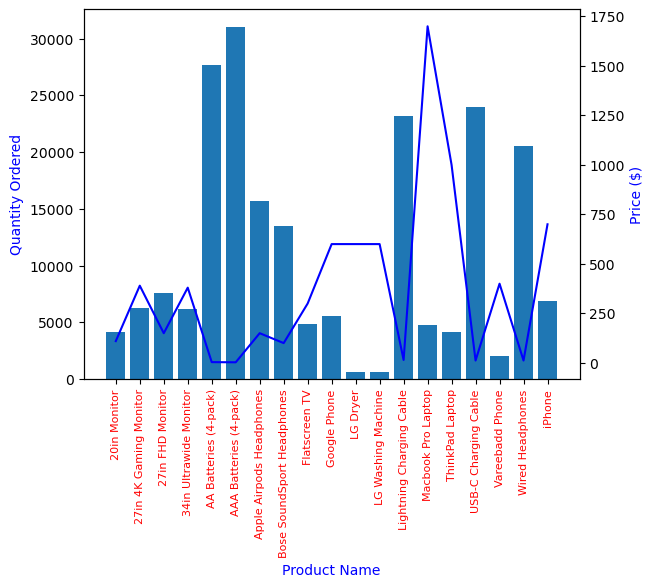

In [26]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name', color='b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8, color='r')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='b')

plt.show()




### Conclusions

# THE END!!!